In [30]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

table = pd.read_csv("table_u0_g_col.csv")
table.fillna(value=0)
narray = table.values
nt = narray.T
initial_array = list(zip(nt[0],nt[1],nt[2]))

In [36]:
len(table)

193251

In [37]:
len(initial_array)

193251

In [16]:
arr = initial_array[100:150]

In [17]:
def uwe(chi2, good_obs):
    u = math.sqrt(chi2/(good_obs-5))
    return u

def ruwe(u, g, b_r):
    u0 = bilinear_interpolation(g, b_r, arr)
    return u/u0

def bilinear_interpolation(x, y, points):
    '''Interpolate (x,y) from values associated with four points.

    The four points are a list of four triplets:  (x, y, value).
    The four points can be in any order.  They should form a rectangle.

        >>> bilinear_interpolation(12, 5.5,
        ...                        [(10, 4, 100),
        ...                         (20, 4, 200),
        ...                         (10, 6, 150),
        ...                         (20, 6, 300)])
        165.0

    '''
    # See formula at:  http://en.wikipedia.org/wiki/Bilinear_interpolation

    points = sorted(points)               # order points by x, then by y
    (x1, y1, q11), (_x1, y2, q12), (x2, _y1, q21), (_x2, _y2, q22) = points

    if x1 != _x1 or x2 != _x2 or y1 != _y1 or y2 != _y2:
        raise ValueError('points do not form a rectangle')
    if not x1 <= x <= x2 or not y1 <= y <= y2:
        raise ValueError('(x, y) not within the rectangle')

    return (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)
           ) / ((x2 - x1) * (y2 - y1) + 0.0)

In [18]:
n = [(54.5, 17.041667, 31.993),
     (54.5, 17.083333, 31.911),
     (54.458333, 17.041667, 31.945),
     (54.458333, 17.083333, 31.866)]
bilinear_interpolation(54.4786674627, 17.0470721369, n)


31.957986883136307

In [19]:
from matplotlib import colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from scipy.spatial import SphericalVoronoi
from mpl_toolkits.mplot3d import proj3d

from scipy.spatial import Voronoi
vor = Voronoi(arr)

from scipy.spatial import Delaunay
tri = Delaunay(arr)

In [21]:
#Delaunay
points = np.asarray(arr)

In [38]:
# Point indices and coordinates for the triangles forming the triangulation:
testpoints = points[tri.simplices]
len(testpoints)

207

In [39]:
tri = Delaunay(initial_array)
points = np.asarray(initial_array)
# Point indices and coordinates for the triangles forming the triangulation:
allpoints = points[tri.simplices]
len(allpoints)

1604510

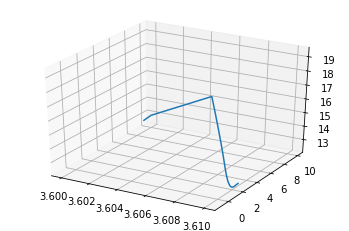

In [23]:
# Displays the triangulation points above

x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot3D(x, y, z)
plt.show()

In [31]:
# The triangles in parameter space determine which x, y, z points are connected by an edge
ax.plot_trisurf(x, y, z, triangles=tri.simplices, cmap=plt.cm.Spectral)

plt.show()

In [25]:
temp = points[tri.simplices]

temp2 = temp.T
list(zip(temp2[0], temp2[1], temp2[2]))

[(array([3.61, 3.61, 3.6 , 3.6 , 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.61,
         3.61, 3.61, 3.61, 3.61, 3.61, 3.61, 3.6 , 3.6 , 3.6 , 3.6 , 3.6 ,
         3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 ,
         3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 ,
         3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 , 3.6 ,
         3.6 , 3.6 , 3.6 

In [26]:
# Voroni
vor.vertices

array([[-2.19461681e+03,  2.31083918e+00,  1.30899337e+01],
       [-2.02555557e+03,  2.52458598e+00,  1.35227656e+01],
       [-3.35857452e+04,  1.74116675e+02, -2.03067076e+03],
       [-3.30424248e+04,  1.71647692e+02, -1.99994483e+03],
       [ 1.63808927e+04,  2.73588773e+01,  2.96356833e+01],
       [ 9.29427859e+02,  9.17189971e+00,  2.26593402e+01],
       [ 8.47089886e+02,  9.07379438e+00,  2.26217080e+01],
       [ 7.65842721e+02,  8.97578496e+00,  2.25841125e+01],
       [ 5.27946135e+02,  8.68149050e+00,  2.24712241e+01],
       [ 2.24867244e+02,  8.28904121e+00,  2.23206845e+01],
       [ 1.11552381e+04,  2.04935215e+01,  2.58945602e+01],
       [ 1.54370082e+03,  9.24982210e+00,  2.16893116e+01],
       [ 1.46082505e+03,  9.15169051e+00,  2.16526095e+01],
       [ 1.37903224e+03,  9.05364542e+00,  2.16159397e+01],
       [ 1.13951756e+03,  8.75927141e+00,  2.15058410e+01],
       [ 8.34280168e+02,  8.36672409e+00,  2.13590247e+01],
       [ 4.62295640e+03,  1.19419167e+01

In [27]:
vor.regions

[[],
 [-1,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183],
 [-1,
  9,
  15,
  26,
  27,
  33,
  48,
  62,
  63,
  74,
  75,
  86,
  87,
  93,
  94,
  152,
  154,
  156,
  158,
  160,
  162,
  164,
  166,
  168,
  170,
  172,
  174,
  176,
  178,
  180],
 [-1,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  153,
  155,
  157,
  159,
  161,
  163,
  165,
  167,
  169,
  171,
  173,
  175,
  177,
  179,
  181],
 [-1,
  8,
  14,
  24,
  25,
  32,
  50,
  60,
  61,
  72,
  73,
  84,
  85,
  95,
  96,
  105,
  107,
  109,
  111,
  113,
  115,
  117,
  119,
  121,
  123,
  125,
  127,
  129,
  131,
  133,
  149,
  181,
  183],
 [-1,
  2,
  3,
  6,
  7,
  12,
  13,
  20,
  21,
  22,
  23,
  30,
  31,
  51,
  56,
  57,
  58,
  59,
  68,
  69,
  70,
  71,
  80,
  

In [28]:
vor.ridge_vertices

[[152, 153, 155, 154],
 [-1,
  152,
  154,
  156,
  158,
  160,
  162,
  164,
  166,
  168,
  170,
  172,
  174,
  176,
  178,
  180],
 [152, -1, 153],
 [-1,
  181,
  179,
  177,
  175,
  173,
  171,
  169,
  167,
  165,
  163,
  161,
  159,
  157,
  155,
  153],
 [154, 156, 157, 155],
 [156, 158, 159, 157],
 [158, 160, 161, 159],
 [160, 162, 163, 161],
 [162, 164, 165, 163],
 [164, 165, 167, 166],
 [166, 168, 169, 167],
 [168, 170, 171, 169],
 [170, 172, 173, 171],
 [172, 174, 175, 173],
 [174, 175, 177, 176],
 [176, 178, 179, 177],
 [178, 180, 182, 183, 181, 179],
 [-1, 182, 183],
 [-1, 181, 183],
 [-1, 180, 182],
 [-1, 62, 63, 9, 74, 75, 15, 86, 87, 33, 27, 26, 93, 94, 48, 180],
 [-1, 62, 152],
 [9, 63, 154, 156],
 [9, 74, 158, 156],
 [15, 75, 160, 162],
 [15, 86, 164, 162],
 [26, 27, 170, 172],
 [26, 93, 174, 172],
 [27, 33, 168, 170],
 [33, 87, 166, 168],
 [48, 94, 176, 178],
 [48, 180, 178],
 [62, 63, 154, 152],
 [74, 75, 160, 158],
 [86, 87, 166, 164],
 [93, 94, 176, 174],
 [-1,

In [29]:
# ridges are perpendicular between lines drawn between the following points:
vor.ridge_points

array([[ 2, 12],
       [ 2,  1],
       [ 2, 11],
       [ 2,  3],
       [ 2, 13],
       [ 2, 14],
       [ 2, 15],
       [ 2, 16],
       [ 2, 17],
       [ 2, 18],
       [ 2, 19],
       [ 2, 20],
       [ 2, 21],
       [ 2, 22],
       [ 2, 23],
       [ 2, 24],
       [ 2, 49],
       [ 2,  8],
       [ 2,  5],
       [ 2,  0],
       [ 1,  0],
       [ 1, 11],
       [ 1, 13],
       [ 1, 14],
       [ 1, 16],
       [ 1, 17],
       [ 1, 21],
       [ 1, 22],
       [ 1, 20],
       [ 1, 19],
       [ 1, 24],
       [ 1, 49],
       [ 1, 12],
       [ 1, 15],
       [ 1, 18],
       [ 1, 23],
       [ 3,  4],
       [ 3, 11],
       [ 3, 12],
       [ 3, 13],
       [ 3, 14],
       [ 3, 15],
       [ 3, 16],
       [ 3, 17],
       [ 3, 18],
       [ 3, 19],
       [ 3, 20],
       [ 3, 21],
       [ 3, 22],
       [ 3, 23],
       [ 3, 24],
       [ 3, 49],
       [ 3,  5],
       [ 5,  6],
       [ 5,  8],
       [ 5,  4],
       [ 5, 13],
       [ 5, 14],
       [ 5, 16